In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv"

In [3]:
pd.read_csv(data).head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
diabetes = pd.read_csv(data)

In [5]:
diabetes   ### Feactures = x = matrix, features; Diabetic = Label, y, Target

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [6]:
diabetes.tail()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0
14999,1386396,3,114,65,47,512,36.215437,0.147363,34,1


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [8]:
diabetes.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [9]:
diabetes.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [10]:
diabetes.corr()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,1.000000,0.006774,-0.001858,0.008746,-0.002406,-0.020698,-0.003156,-0.015413,-0.007096,-0.012494
Pregnancies,0.006774,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972,0.407315
PlasmaGlucose,-0.001858,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864,0.128004
DiastolicBloodPressure,0.008746,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333,0.091307
TricepsThickness,-0.002406,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383,0.152505
SerumInsulin,-0.020698,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007,0.247375
BMI,-0.003156,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910,0.210508
DiabetesPedigree,-0.015413,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633,0.170302
Age,-0.007096,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000,0.342605
Diabetic,-0.012494,0.407315,0.128004,0.091307,0.152505,0.247375,0.210508,0.170302,0.342605,1.000000


<AxesSubplot:>

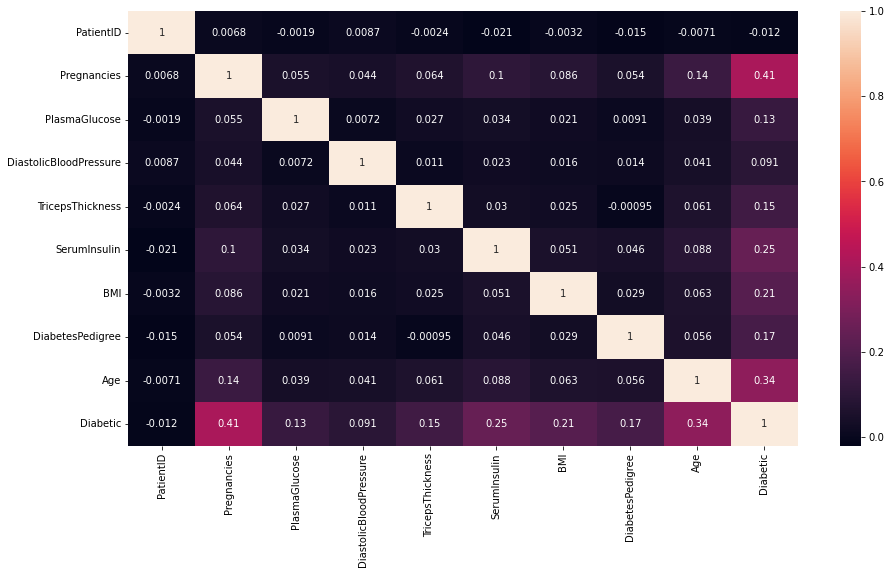

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(diabetes.corr(), ax=ax, annot = True) 

In [12]:
diabetes["BMI"].corr(diabetes["Age"]) 

0.06290975443006985

# Feature Selection using correlation

In [13]:
df = diabetes.drop("Diabetic", axis = 1)

In [14]:
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,1354778,0,171,80,34,23,43.509726,1.213191,21
1,1147438,8,92,93,47,36,21.240576,0.158365,23
2,1640031,7,115,47,52,35,41.511523,0.079019,23
3,1883350,9,103,78,25,304,29.582192,1.282870,43
4,1424119,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41
14996,1744410,2,73,66,27,168,30.132636,0.862252,38
14997,1742742,0,93,89,43,57,18.690683,0.427049,24
14998,1099353,0,132,98,18,161,19.791645,0.302257,23


<AxesSubplot:>

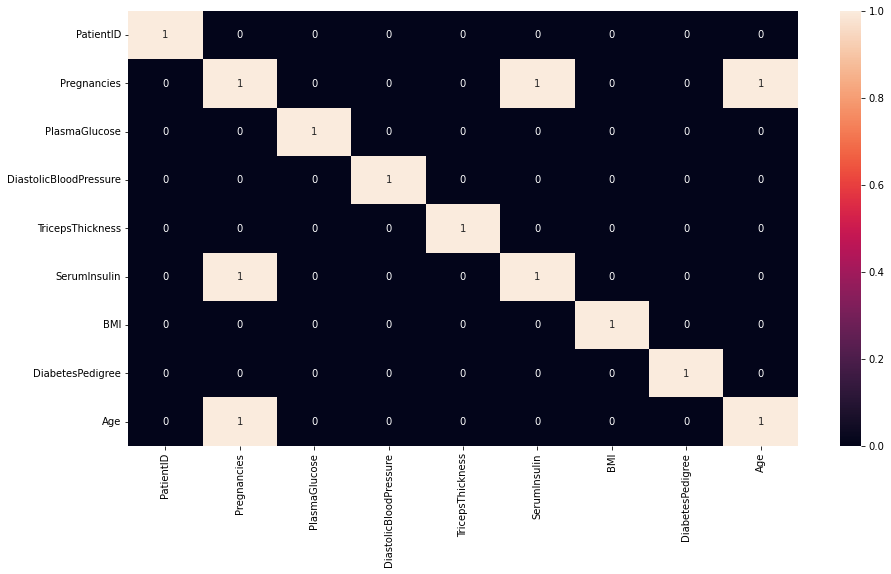

In [15]:
fig, ax = plt.subplots(figsize=(15,8))    ###Checking for Multicorreniality
sns.heatmap(df.corr()>0.1, ax=ax, annot = True) 

In [16]:
diabetes["Pregnancies"].corr(diabetes["Diabetic"])

0.4073152213910228

In [17]:
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [18]:
diabetes.drop(["PatientID"], axis = 1,inplace = True)

In [19]:
diabetes

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41,1
14996,2,73,66,27,168,30.132636,0.862252,38,1
14997,0,93,89,43,57,18.690683,0.427049,24,0
14998,0,132,98,18,161,19.791645,0.302257,23,0


In [20]:
X = diabetes.drop("Diabetic", axis = 1).values  ## Alternative Method

In [21]:
X

array([[0.00000000e+00, 1.71000000e+02, 8.00000000e+01, ...,
        4.35097259e+01, 1.21319135e+00, 2.10000000e+01],
       [8.00000000e+00, 9.20000000e+01, 9.30000000e+01, ...,
        2.12405757e+01, 1.58364981e-01, 2.30000000e+01],
       [7.00000000e+00, 1.15000000e+02, 4.70000000e+01, ...,
        4.15115235e+01, 7.90185680e-02, 2.30000000e+01],
       ...,
       [0.00000000e+00, 9.30000000e+01, 8.90000000e+01, ...,
        1.86906831e+01, 4.27048955e-01, 2.40000000e+01],
       [0.00000000e+00, 1.32000000e+02, 9.80000000e+01, ...,
        1.97916451e+01, 3.02257208e-01, 2.30000000e+01],
       [3.00000000e+00, 1.14000000e+02, 6.50000000e+01, ...,
        3.62154365e+01, 1.47362850e-01, 3.40000000e+01]])

In [22]:
X = diabetes.drop("Diabetic", axis = 1)

In [23]:
X ### features

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23


In [25]:
y = diabetes.loc[:,"Diabetic"]  ## y is Label

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [27]:
model_rg = LogisticRegression()

In [28]:
model_rg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = model_rg.predict(X_test)

In [30]:
score = accuracy_score(y_test,y_pred)

In [31]:
score

0.7871111111111111

In [32]:
confusion_matrix(y_test,y_pred)

array([[2690,  315],
       [ 643,  852]], dtype=int64)

In [33]:
print(confusion_matrix(y_test,y_pred))

[[2690  315]
 [ 643  852]]


In [34]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,2690,315
1,643,852


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3005
           1       0.73      0.57      0.64      1495

    accuracy                           0.79      4500
   macro avg       0.77      0.73      0.74      4500
weighted avg       0.78      0.79      0.78      4500



In [36]:
### Random Forest

In [37]:
model_rf = RandomForestClassifier()

In [38]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred_r = model_rf.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred_r)

0.9331111111111111

In [41]:
print(confusion_matrix(y_test,y_pred_r))

[[2886  119]
 [ 182 1313]]


In [42]:
### KNN

In [43]:
model_knn = KNeighborsClassifier()

In [44]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
pred_knn = model_knn.predict(X_test)

In [46]:
accuracy_score(y_test,pred_knn)

0.8417777777777777